In [6]:
%matplotlib inline
import seaborn as sns
import pymc as pm

In [3]:
# Number of times we simulate
n_samples = 80000
burnin = 1000

#Visits & conversions
n_A = 11286
n_B = 11240
conv_A = 959
conv_B = 1169

# Set up the pymc model.
p_A = pm.Beta("p_A", 5, 50)
p_B = pm.Beta("p_B", 5, 50)

# Define the deterministic delta function. This is our unknown of interest.
@pm.deterministic
def delta(p_A=p_A, p_B=p_B):
    return p_A - p_B

obs_A = pm.Binomial("obs_A", n_A, p_A, value=conv_A, observed=True)
obs_B = pm.Binomial("obs_B", n_B, p_B, value=conv_B, observed=True)


model = pm.Model([p_A, p_B, delta, obs_A, obs_B])
mcmc = pm.MCMC(model)
mcmc.sample(n_samples, burnin)


p_A_samples = mcmc.trace("p_A")[:]
p_B_samples = mcmc.trace("p_B")[:]

delta_samples = mcmc.trace("delta")[:]

 [-----------------100%-----------------] 80000 of 80000 complete in 11.1 sec

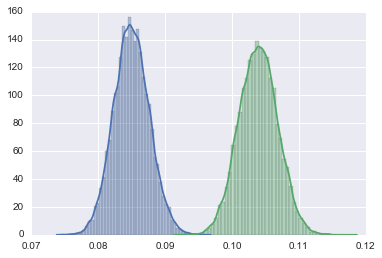

In [7]:
sns.distplot(p_A_samples)
sns.distplot(p_B_samples)

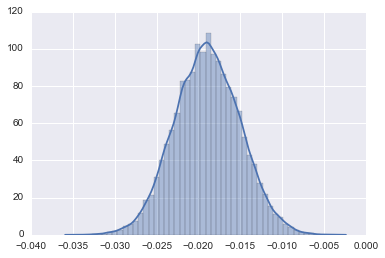

In [8]:
sns.distplot(delta_samples)